<a href="https://colab.research.google.com/github/Naveenkumar-n7/Naveenkumar/blob/main/Gold%20price%20prediction%20using%20machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Step 1 - Data collection and processing


In [ ]:
gd=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gd.tail()                    # tail is to see the last 5 value in dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# to see number of column and rows
gd.shape

(2290, 6)

In [ ]:
# to see additional information of data
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# have to check if any missing value is there
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# to see statistical values
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation-Correlation describes the relationship between variables. It can be described as either strong or weak, and as either positive or negative.

Types

1) positive correlation-positive correlation when the variable on the
x
-axis increases as the variable on the
y
-axis increases.

2)Negative correlation-negative correlation when one variable increases as the other variable decreases.

#Building heat map to understandd the correlation

In [ ]:
gd=gd.drop(['Date'],axis=1)

In [ ]:
correlation=gd.corr()

<Axes: >

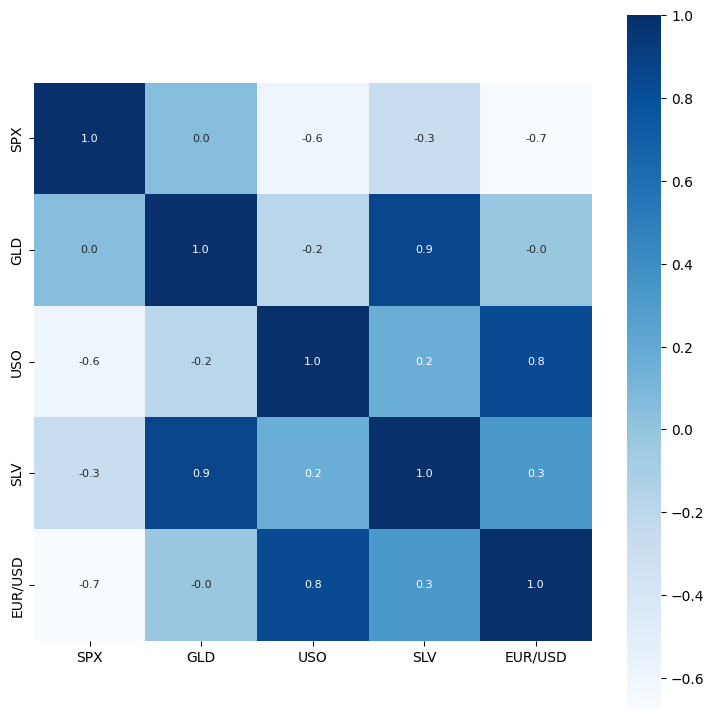

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correaltion value
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-104-8b25ba09841e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gd['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

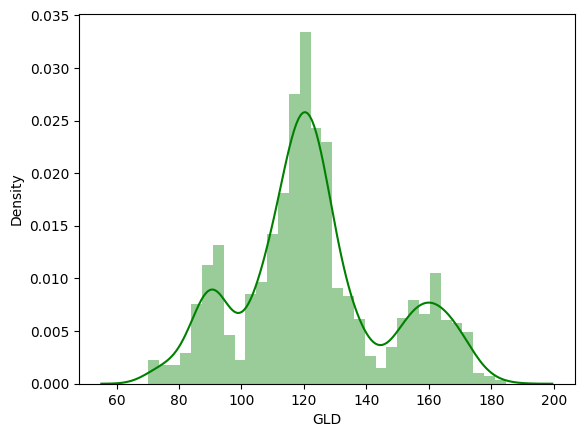

In [ ]:
sns.distplot(gd['GLD'],color='green')

In [ ]:
a=gd.drop(['GLD'],axis=1)
b=gd['GLD']

In [ ]:
print(a)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(b)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting the training data and test data

In [ ]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

training model=random forest regressor

In [ ]:
regg=RandomForestRegressor(n_estimators=100)

In [ ]:
regg.fit(a_train,b_train)

RandomForestRegressor()

In [ ]:
test_data_on_prediction=regg.predict(a_test)

In [ ]:
print(test_data_on_prediction)

[168.5150992   81.54870005 116.04989997 127.63200068 120.83910105
 154.59179775 150.13329815 126.31600045 117.61019885 125.94620086
 116.76150082 171.63020112 141.70649871 167.65149807 115.20709973
 117.25450024 138.20580337 169.95260063 159.59910291 158.6664995
 155.14800041 124.89930023 175.1480996  156.84120409 125.22940026
  93.8336998   77.85030001 120.36579983 119.09829966 167.45369996
  88.22890083 125.32209983  91.07710104 117.75619998 121.2006992
 135.95540011 115.73210126 115.01550059 146.93859956 107.07090074
 104.5864024   87.19439792 126.51860044 117.88969996 152.26519948
 119.80479954 108.34170012 108.20589797  93.14070053 127.11649768
  74.78030026 113.61469902 121.22100022 111.28189903 118.891999
 120.59169966 158.49080058 167.50350099 146.72829648  85.9387984
  94.30840049  86.85449862  90.52210027 119.16310045 126.41130026
 127.70140017 170.50880116 122.21119968 117.49349917  98.54730054
 168.01580155 143.37609886 132.07210192 121.27210211 121.06809959
 119.48480062 1

In [ ]:
error_score=metrics.r2_score(b_test,test_data_on_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892443420603864


In [ ]:
b_test=list(b_test)

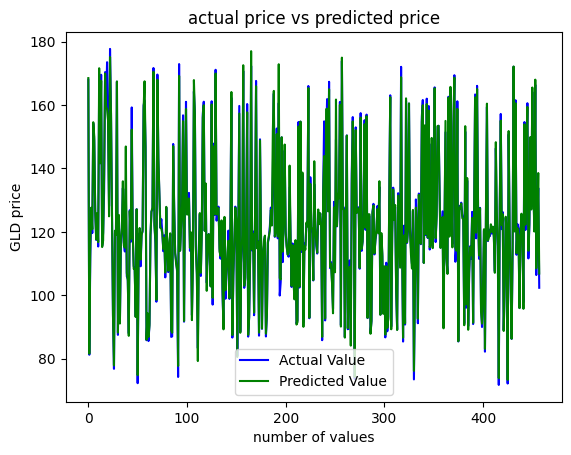

In [ ]:
plt.plot(b_test,color='blue',label='Actual Value')
plt.plot(test_data_on_prediction,color='green',label='Predicted Value')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()